Flood columns: Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')
Cyclone columns: Index(['Sea_Surface_Temperature', 'Atmospheric_Pressure', 'Humidity',
       'Wind_Shear', 'Vorticity', 'Latitude', 'Ocean_Depth',
       'Proximity_to_Coastline', 'Pre_existing_Disturbance', 'Cyclone'],
      dtype='object')
Heatwave columns: Index(['date', 'latitude', 'longitude', 'wind_speed', 'cloud_cover',
       'precipitation_probability', 'pressure_surface_level', 'dew_point',
       'uv_index', 'heatwave', 'visibility', 'rainfall', 'solar_radiation',
       'snowfall',

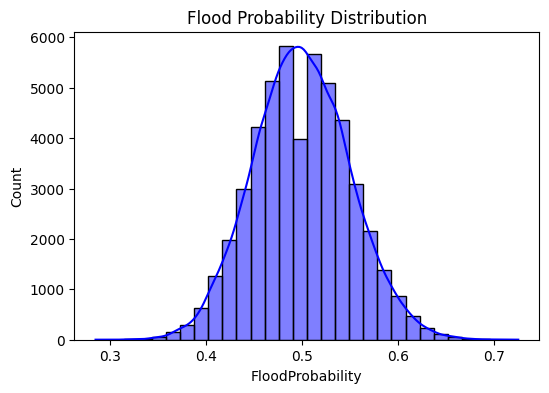

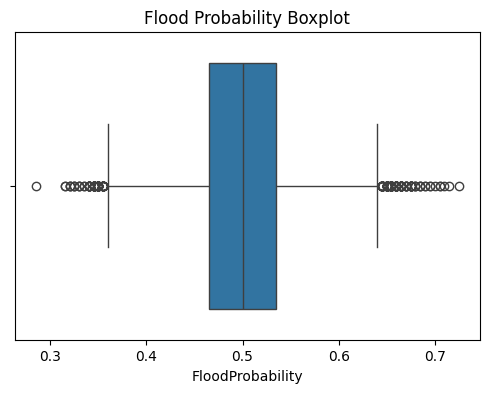

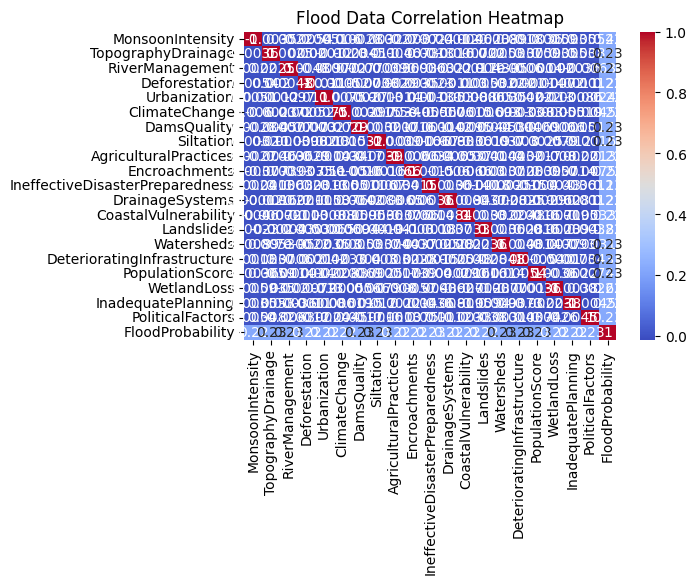

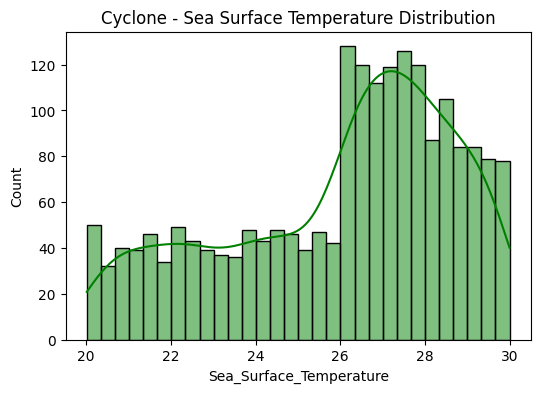

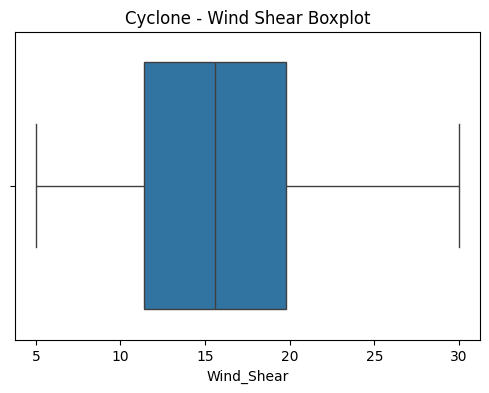

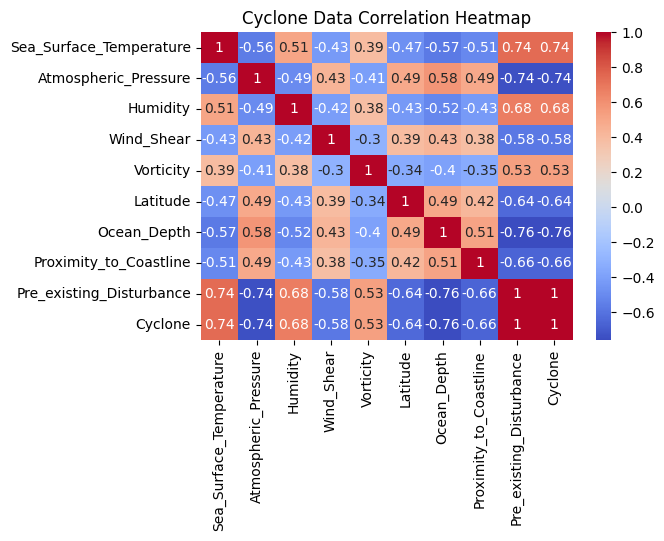

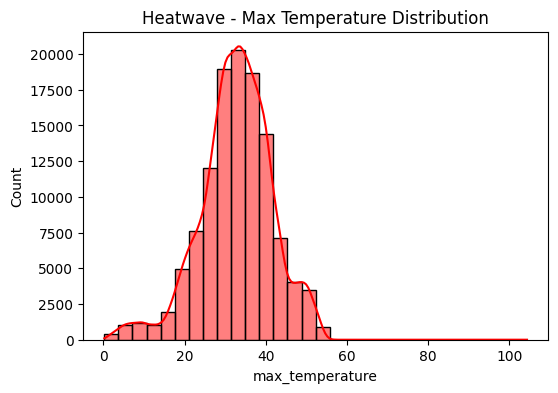

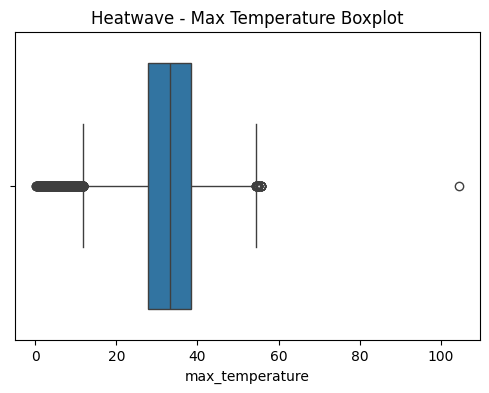

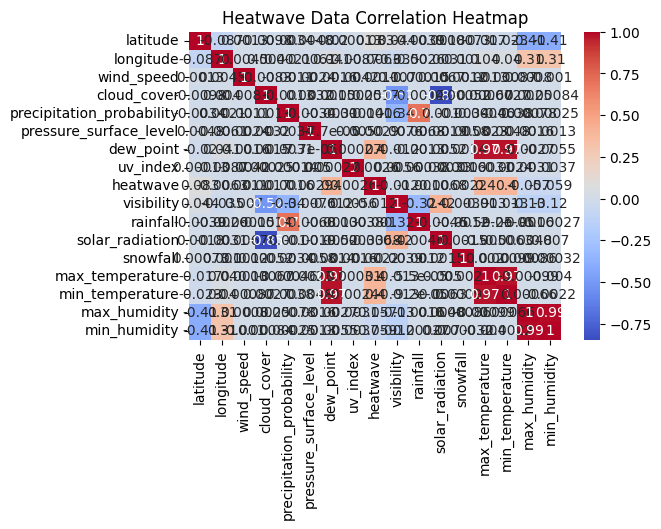

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
import os

# ========== Function to train & save model ==========
def train_save_model(df, target_col, model_name):
    # Fill missing values
    df = df.fillna(0)
    X = df.drop(target_col, axis=1).select_dtypes(include=['int64','float64'])
    y = LabelEncoder().fit_transform(df[target_col])

    if X.shape[1] == 0:
        print(f"{model_name} dataset has no numeric columns to train.")
        return

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Random Forest model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    print(f"{model_name} Accuracy: {model.score(X_test, y_test):.2f}")

    # Save model & scaler
    os.makedirs("models", exist_ok=True)
    pickle.dump(model, open(f"models/{model_name}_model.pkl", "wb"))
    pickle.dump(scaler, open(f"models/{model_name}_scaler.pkl", "wb"))
    print(f"{model_name} model & scaler saved!\n")

# ========== Load datasets ==========
flood = pd.read_csv("flood.csv")
cyclone = pd.read_csv("cyclone_dataset.csv")
heatwave = pd.read_csv("india_weather_data.csv")

# ========== Debug: Check columns ==========
print("Flood columns:", flood.columns)
print("Cyclone columns:", cyclone.columns)
print("Heatwave columns:", heatwave.columns)

# ========== Convert non-numeric columns ==========
for df in [flood, cyclone, heatwave]:
    non_numeric_cols = df.select_dtypes(exclude=['int64','float64']).columns
    for col in non_numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# ========== Train & save models ==========
if 'FloodProbability' in flood.columns:
    train_save_model(flood, 'FloodProbability', 'flood')

if 'Cyclone' in cyclone.columns:
    train_save_model(cyclone, 'Cyclone', 'cyclone')

if 'heatwave' in heatwave.columns:
    train_save_model(heatwave, 'heatwave', 'heatwave')

# ================== EDA Part ==================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
flood = pd.read_csv("flood.csv")
cyclone = pd.read_csv("cyclone_dataset.csv")
heatwave = pd.read_csv("india_weather_data.csv")

# ========== Flood ==========
plt.figure(figsize=(6,4))
sns.histplot(flood['FloodProbability'], kde=True, bins=30, color='blue')
plt.title("Flood Probability Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=flood['FloodProbability'])
plt.title("Flood Probability Boxplot")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(flood.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Flood Data Correlation Heatmap")
plt.show()

# ========== Cyclone ==========
plt.figure(figsize=(6,4))
sns.histplot(cyclone['Sea_Surface_Temperature'], kde=True, bins=30, color='green')
plt.title("Cyclone - Sea Surface Temperature Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=cyclone['Wind_Shear'])
plt.title("Cyclone - Wind Shear Boxplot")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(cyclone.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Cyclone Data Correlation Heatmap")
plt.show()

# ========== Heatwave ==========
plt.figure(figsize=(6,4))
sns.histplot(heatwave['max_temperature'], kde=True, bins=30, color='red')
plt.title("Heatwave - Max Temperature Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=heatwave['max_temperature'])
plt.title("Heatwave - Max Temperature Boxplot")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(heatwave.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Heatwave Data Correlation Heatmap")
plt.show()

